In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ignorar warnings
warnings.filterwarnings('ignore')

Matplotlib is building the font cache; this may take a moment.


In [16]:
df_general_info = pd.read_csv("/Users/saramiranda/Desktop/country_data_dsf_project/data/processed/general_info_clean.csv")
df_environmental_infrastructure = pd.read_csv("/Users/saramiranda/Desktop/country_data_dsf_project/data/processed/environment_infrastructure_clean.csv")
df_economic_indicators = pd.read_csv("/Users/saramiranda/Desktop/country_data_dsf_project/data/processed/economic_indicators_clean.csv")
df_social_indicators = pd.read_csv("/Users/saramiranda/Desktop/country_data_dsf_project/data/processed/social_indicators_clean.csv")


In [13]:
df_general_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       232 non-null    object 
 1   Capital city                  232 non-null    object 
 2   Exchange rate (per US$)       231 non-null    float64
 3   National currency             231 non-null    object 
 4   Pop. density (per km2, 2024)  230 non-null    float64
 5   Population (000, 2024)        230 non-null    float64
 6   Region                        232 non-null    object 
 7   Sex ratio (m per 100 f)       230 non-null    float64
 8   Surface area (km2)            226 non-null    float64
 9   UN membership date            193 non-null    object 
 10  Capital_city_pop              231 non-null    float64
dtypes: float64(6), object(5)
memory usage: 20.1+ KB


In [9]:
df_environmental_infrastructure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                   --------------  -----  
 0   Country                                                                                                  696 non-null    object 
 1   Year                                                                                                     696 non-null    int64  
 2   Energy production, primary (Petajoules)                                                                  656 non-null    float64
 3   Energy supply per capita (Gigajoules)                                                                    668 non-null    float64
 4   Forested area (% of land area)                                                        

In [10]:
df_economic_indicators.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687 entries, 0 to 686
Data columns (total 21 columns):
 #   Column                                                                                 Non-Null Count  Dtype  
---  ------                                                                                 --------------  -----  
 0   Country                                                                                687 non-null    object 
 1   Year                                                                                   687 non-null    float64
 2   Agricultural production index (2014-2016=100)                                          594 non-null    float64
 3   Balance of payments, current account (million US$)                                     562 non-null    float64
 4   CPI: Consumer Price Index (2010=100)                                                   586 non-null    float64
 5   Economy: Agriculture (% of Gross Value Added)                                 

In [11]:
df_social_indicators.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 31 columns):
 #   Column                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                   --------------  -----  
 0   Country                                                                                                  696 non-null    object 
 1   Year                                                                                                     696 non-null    float64
 2   Education: Government expenditure (% of GDP)                                                             459 non-null    float64
 3   Fertility rate, total (live births per woman)                                                            690 non-null    float64
 4   Health: Current expenditure (% of GDP)                                                

In [32]:
cols_a_evaluar = [
    "Country",
    "Year",
    "Fertility rate, total (live births per woman)",
    "Health: Current expenditure (% of GDP)",
    "Health: Physicians (per 1 000 pop.)",
    "Under five mortality rate (per 1000 live births)",
    "Urban population (% of total population)",
    "Education: Government expenditure (% of GDP)",
    "Education: Primary gross enrol. ratio - Female (per 100 pop.)",
    "Education: Primary gross enrol. ratio - Male (per 100 pop.)",
    "Education: Upper Sec. gross enrol. ratio - Female (per 100 pop.)",
    "Education: Upper Sec. gross enrol. ratio - Male (per 100 pop.)",
    "Education: Lower Sec. gross enrol. ratio - Female (per 100 pop.)",
    "Education: Lower Sec. gross enrol. ratio - Male (per 100 pop.)",
    "Population age distribution - 0-14 years (%)",
    "Population age distribution - 60+ years (%)",
    "Life expectancy at birth - Female (years)",
    "Life expectancy at birth - Male (years)",
    "Life expectancy at birth - Female/Life expectancy at birth - Male Ratio",
    "Intentional homicide rate (per 100 000 pop.)"
]


In [30]:
df_analisis = df_social_indicators[cols_a_evaluar]

print("Table size", df_analisis.shape, "\n")
print(df_analisis.head())

Table size (696, 19) 

       Country    Year  Fertility rate, total (live births per woman)  \
0  Afghanistan  2015.0                                            5.7   
1  Afghanistan  2020.0                                            5.1   
2  Afghanistan  2024.0                                            4.8   
3      Albania  2015.0                                            1.6   
4      Albania  2020.0                                            1.4   

   Health: Current expenditure (% of GDP)  \
0                                    10.1   
1                                    15.5   
2                                    21.8   
3                                     6.5   
4                                     7.5   

   Health: Physicians (per 1 000 pop.)  \
0                                  0.3   
1                                  0.3   
2                                  NaN   
3                                  1.3   
4                                  1.9   

   Under five 

In [33]:
cols_simplificados = [
    "Country",
    "Year",
    "FertilityRate",
    "Health_ExpenditureGDP",
    "Physicians_per1000",
    "Under5_Mortality",
    "UrbanPop_Perc",
    "Edu_ExpenditureGDP",
    "PrimaryEnroll_F",
    "PrimaryEnroll_M",
    "UpperSecEnroll_F",
    "UpperSecEnroll_M",
    "LowerSecEnroll_F",
    "LowerSecEnroll_M",
    "Pop_0_14_Perc",
    "Pop_60plus_Perc",
    "LifeExp_F",
    "LifeExp_M",
    "LifeExp_FM_Ratio",
    "HomicideRate"
]
rename_dict = dict(zip(cols_a_evaluar, cols_simplificados))
df_analisis = df_analisis.rename(columns=rename_dict)


In [40]:
df_analisis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                696 non-null    object 
 1   Year                   696 non-null    float64
 2   FertilityRate          690 non-null    float64
 3   Health_ExpenditureGDP  568 non-null    float64
 4   Physicians_per1000     475 non-null    float64
 5   Under5_Mortality       690 non-null    float64
 6   UrbanPop_Perc          464 non-null    float64
 7   Edu_ExpenditureGDP     459 non-null    float64
 8   PrimaryEnroll_F        561 non-null    float64
 9   PrimaryEnroll_M        561 non-null    float64
 10  UpperSecEnroll_F       517 non-null    float64
 11  UpperSecEnroll_M       517 non-null    float64
 12  LowerSecEnroll_F       541 non-null    float64
 13  LowerSecEnroll_M       538 non-null    float64
 14  Pop_0_14_Perc          690 non-null    float64
 15  Pop_60

In [34]:
print(df_analisis.head())

       Country    Year  FertilityRate  Health_ExpenditureGDP  \
0  Afghanistan  2015.0            5.7                   10.1   
1  Afghanistan  2020.0            5.1                   15.5   
2  Afghanistan  2024.0            4.8                   21.8   
3      Albania  2015.0            1.6                    6.5   
4      Albania  2020.0            1.4                    7.5   

   Physicians_per1000  Under5_Mortality  UrbanPop_Perc  Edu_ExpenditureGDP  \
0                 0.3              76.5           24.8                 3.3   
1                 0.3              62.9           25.8                 2.9   
2                 NaN              54.5            NaN                 NaN   
3                 1.3              10.1           57.4                 3.4   
4                 1.9               9.4           61.2                 3.3   

   PrimaryEnroll_F  PrimaryEnroll_M  UpperSecEnroll_F  UpperSecEnroll_M  \
0             85.9            125.4              27.9              54.3

## El top 10 paises con mayor ratio de Life expectancy. 

### life expectancy ratio 
100 → mujeres y hombres tienen la misma esperanza de vida. 

\>100 → mujeres viven más años que los hombres.

<100 → hombres viven más años que las mujeres (rarísimo).


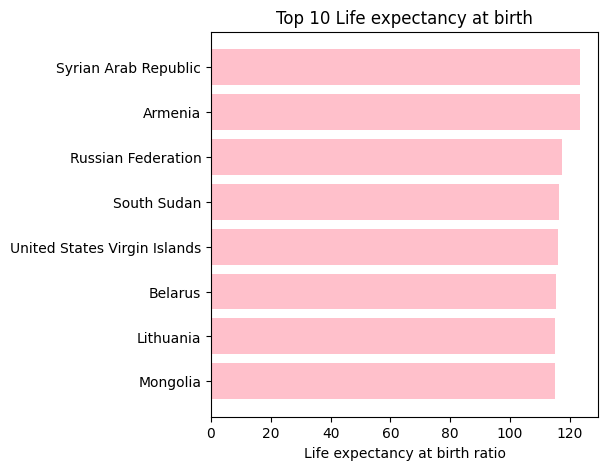

In [22]:
top10 = df_social_indicators.nlargest(10, "Life expectancy at birth - Female/Life expectancy at birth - Male Ratio")

plt.figure(figsize=(5,5))
plt.barh(top10["Country"], top10["Life expectancy at birth - Female/Life expectancy at birth - Male Ratio"], color="pink")
plt.xlabel("Life expectancy at birth ratio")
plt.title("Mayor life expectancy en Hombres")
plt.gca().invert_yaxis()
plt.show()

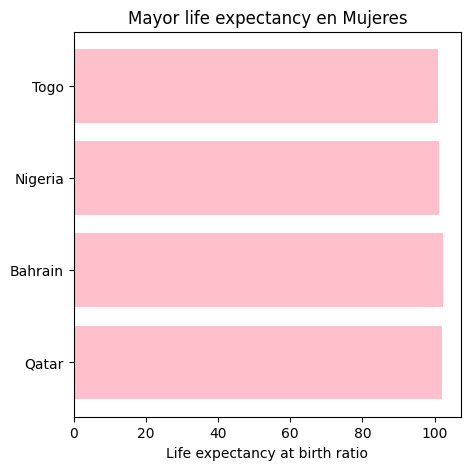

In [31]:
top10 = df_social_indicators.nsmallest(10, "Life expectancy at birth - Female/Life expectancy at birth - Male Ratio")

plt.figure(figsize=(5,5))
plt.barh(top10["Country"], top10["Life expectancy at birth - Female/Life expectancy at birth - Male Ratio"], color="pink")
plt.xlabel("Life expectancy at birth ratio")
plt.title("Mayor life expectancy en Mujeres")
plt.gca().invert_yaxis()
plt.show()

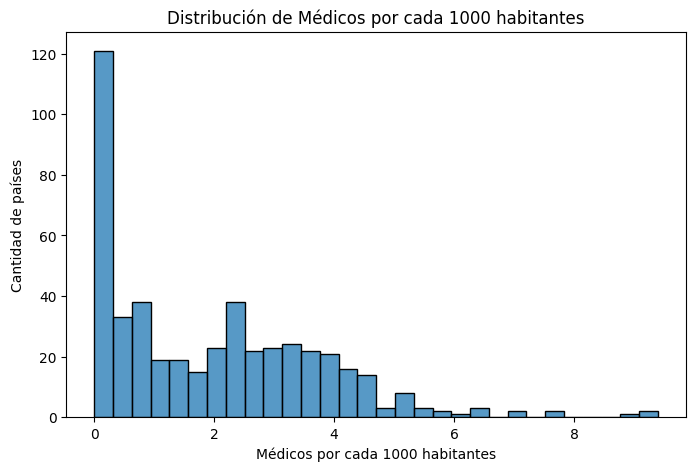

In [42]:
plt.figure(figsize=(8,5))
sns.histplot(df_analisis['Physicians_per1000'], bins=30)
plt.title("Distribución de Médicos por cada 1000 habitantes")
plt.xlabel("Médicos por cada 1000 habitantes")
plt.ylabel("Cantidad de países")
plt.show()

In [ ]:
# Tabla de estadísticas descriptivas de variables clave relacionadas con salud y bienestar
variables_salud = [
    'Physicians_per1000',
    'Health_ExpenditureGDP', 
    'Under5_Mortality',
    'LifeExp_F',
    'LifeExp_M',
    'Pop_60plus_Perc'
]

# Crear tabla de estadísticas descriptivas
stats_table = df_analisis[variables_salud].describe().round(2)

print("📊 ESTADÍSTICAS DESCRIPTIVAS - VARIABLES DE SALUD Y BIENESTAR")
print("="*80)
print(stats_table)

# Información adicional sobre valores faltantes
print(f"\n📋 INFORMACIÓN DE COMPLETITUD DE DATOS:")
print("="*50)
for var in variables_salud:
    total = len(df_analisis[var])
    non_null = df_analisis[var].notna().sum()
    completeness = (non_null/total)*100
    print(f"{var:25s}: {non_null:3d}/{total:3d} ({completeness:5.1f}% completo)")

# Top 5 países con más y menos médicos
print(f"\n🏥 TOP 5 PAÍSES CON MÁS MÉDICOS POR 1000 HAB:")
print("-"*50)
top_physicians = df_analisis.nlargest(5, 'Physicians_per1000')[['Country', 'Year', 'Physicians_per1000']]
for _, row in top_physicians.iterrows():
    print(f"{row['Country']:20s} ({row['Year']:.0f}): {row['Physicians_per1000']:.2f}")

print(f"\n🏥 TOP 5 PAÍSES CON MENOS MÉDICOS POR 1000 HAB:")
print("-"*50)
bottom_physicians = df_analisis.nsmallest(5, 'Physicians_per1000')[['Country', 'Year', 'Physicians_per1000']]
for _, row in bottom_physicians.iterrows():
    print(f"{row['Country']:20s} ({row['Year']:.0f}): {row['Physicians_per1000']:.2f}")